In [16]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

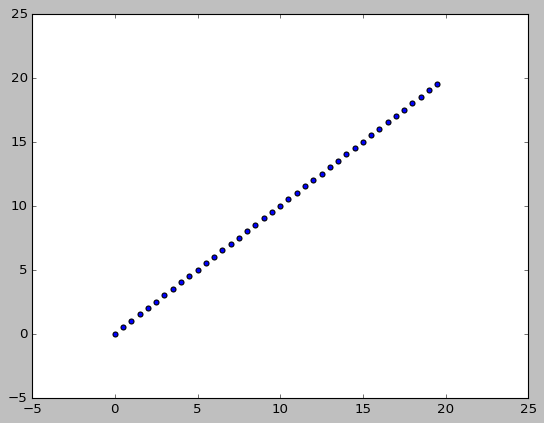

In [68]:
X = np.arange(0, 20, 0.5).reshape(40, 1)
Y = X.copy()
plt.scatter(x, y)

In [54]:
def linear_regression(m, b, x):
    return m * x + b

In [74]:
# simple imperative model
n_iters = 100
learning_rate = 0.001
M = len(X)

m = 0.0
b = 0.0

for i in range(n_iters):
    errors = [(linear_regression(m, b, x) - y)[0] for (x, y) in zip(X, Y)]
    loss =  sum([e ** 2 for e in errors]) / (2.0 * M)
    b = b - (learning_rate * (1.0 / M) * sum(errors))
    m = m - (learning_rate * (1.0 / M) * sum([e * x[0] for (e, x) in zip(errors, X)]))
    print(i, m, b, loss)
    
print(m, b)

0 0.128375 0.00975 64.1875
1 0.240174796875 0.01823859375 48.6823670811
2 0.337539531037 0.0256286508867 36.922697331
3 0.422333014394 0.0320620118082 28.0037261943
4 0.496178409056 0.0376622029061 21.2392465711
5 0.560489299315 0.0425368012149 16.1088134674
6 0.616496751704 0.0467794937453 12.217702037
7 0.66527288114 0.0504718709225 9.26653827148
8 0.707751374282 0.0536849884604 7.02826578469
9 0.744745362971 0.0564807275727 5.33067656611
10 0.776962989906 0.0589129795562 4.04316165375
11 0.805020964526 0.061028677425 3.06666235164
12 0.8294563686 0.0628686943435 2.32604885941
13 0.850736937511 0.0644686260553 1.7643399413
14 0.869270014054 0.0658594722885 1.33831890822
15 0.885410346145 0.0670682301792 1.01520861531
16 0.899466877714 0.0681184110741 0.770149656473
17 0.91170866278 0.0690304906053 0.584287733268
18 0.922370015912 0.0698223006526 0.443323044295
19 0.931654997688 0.0705093706968 0.336410088162
20 0.939741320996 0.0711052250987 0.255323233123
21 0.946783752968 0.0716216

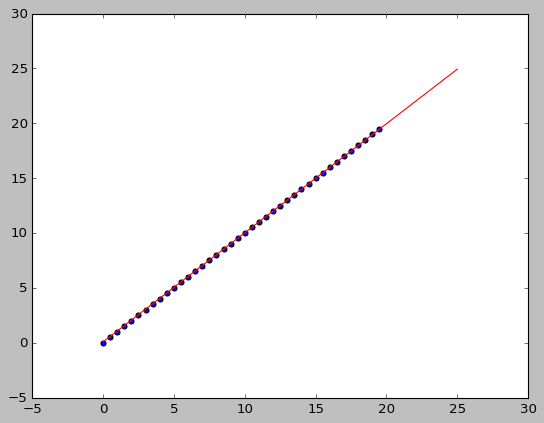

In [75]:
plt.scatter(X, Y)
line_xs = [0, 25]
line_ys = [linear_regression(m, b, x) for x in line_xs]
plt.plot(line_xs, line_ys,
         color='r', linestyle='-')

In [82]:
# linear algebra model
M = len(X)
D = np.hstack([np.ones((M, 1)), X])

n_iters = 100
learning_rate = 0.001

params = np.zeros((2, 1))

for i in range(n_iters):
    errors = (D.dot(params) - Y).squeeze()
    loss =  sum([e ** 2 for e in errors]) / (2.0 * M)
    # m
    params[0] = params[0] - (learning_rate * (1.0 / M) * sum(errors))
    # b
    params[1] = params[1] - (learning_rate * (1.0 / M) * sum([e * x for (e, x) in zip(errors, X)]))
    print(i, params, loss)

0 [[ 0.00975 ]
 [ 0.128375]] 64.1875
1 [[ 0.01823859]
 [ 0.2401748 ]] 48.6823670811
2 [[ 0.02562865]
 [ 0.33753953]] 36.922697331
3 [[ 0.03206201]
 [ 0.42233301]] 28.0037261943
4 [[ 0.0376622 ]
 [ 0.49617841]] 21.2392465711
5 [[ 0.0425368]
 [ 0.5604893]] 16.1088134674
6 [[ 0.04677949]
 [ 0.61649675]] 12.217702037
7 [[ 0.05047187]
 [ 0.66527288]] 9.26653827148
8 [[ 0.05368499]
 [ 0.70775137]] 7.02826578469
9 [[ 0.05648073]
 [ 0.74474536]] 5.33067656611
10 [[ 0.05891298]
 [ 0.77696299]] 4.04316165375
11 [[ 0.06102868]
 [ 0.80502096]] 3.06666235164
12 [[ 0.06286869]
 [ 0.82945637]] 2.32604885941
13 [[ 0.06446863]
 [ 0.85073694]] 1.7643399413
14 [[ 0.06585947]
 [ 0.86927001]] 1.33831890822
15 [[ 0.06706823]
 [ 0.88541035]] 1.01520861531
16 [[ 0.06811841]
 [ 0.89946688]] 0.770149656473
17 [[ 0.06903049]
 [ 0.91170866]] 0.584287733268
18 [[ 0.0698223 ]
 [ 0.92237002]] 0.443323044295
19 [[ 0.07050937]
 [ 0.931655  ]] 0.336410088162
20 [[ 0.07110523]
 [ 0.93974132]] 0.255323233123
21 [[ 0.0716

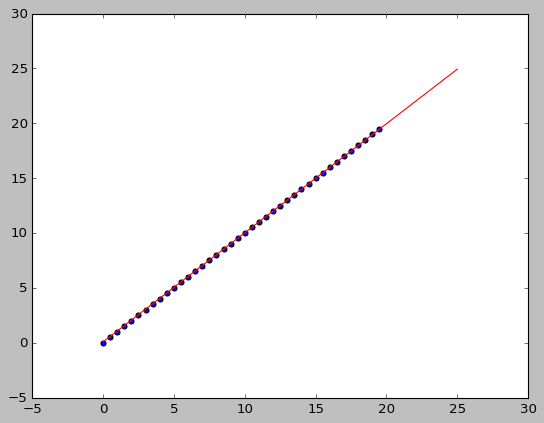

In [83]:
plt.scatter(X, Y)
line_xs = [0, 25]
line_ys = [linear_regression(params[1], params[0], x) for x in line_xs]
plt.plot(line_xs, line_ys,
         color='r', linestyle='-')

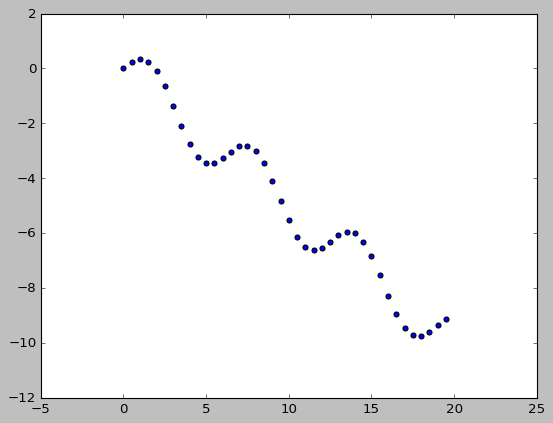

In [86]:
# non-linear data
X = np.arange(0, 20, 0.5).reshape(40, 1)
Y = np.sin(X) - (X / 2.0)
plt.scatter(X, Y)

In [87]:
# linear algebra model
M = len(X)
D = np.hstack([np.ones((M, 1)), X])

n_iters = 100
learning_rate = 0.001

params = np.zeros((2, 1))

for i in range(n_iters):
    errors = (D.dot(params) - Y).squeeze()
    loss =  sum([e ** 2 for e in errors]) / (2.0 * M)
    # m
    params[0] = params[0] - (learning_rate * (1.0 / M) * sum(errors))
    # b
    params[1] = params[1] - (learning_rate * (1.0 / M) * sum([e * x for (e, x) in zip(errors, X)]))
    print(i, params, loss)

0 [[-0.00485744]
 [-0.06476867]] 16.5779889547
1 [[-0.00907852]
 [-0.1211753 ]] 12.6317581308
2 [[-0.01274542]
 [-0.17029958]] 9.63878862975
3 [[-0.01592968]
 [-0.21308177]] 7.36880798173
4 [[-0.01869364]
 [-0.25034076]] 5.64716897849
5 [[-0.02109156]
 [-0.28278967]] 4.34141267977
6 [[-0.02317071]
 [-0.31104957]] 3.35107729725
7 [[-0.02497224]
 [-0.33566134]] 2.5999688731
8 [[-0.026532  ]
 [-0.35709601]] 2.03029907501
9 [[-0.02788122]
 [-0.37576379]] 1.59823908178
10 [[-0.02904708]
 [-0.39202194]] 1.27054748482
11 [[-0.03005325]
 [-0.40618159]] 1.02201276312
12 [[-0.03092036]
 [-0.41851368]] 0.833513561213
13 [[-0.03166637]
 [-0.42925418]] 0.690547531698
14 [[-0.03230691]
 [-0.4386086 ]] 0.582115554768
15 [[-0.0328556]
 [-0.4467559]] 0.499875488753
16 [[-0.03332431]
 [-0.45385194]] 0.437500343047
17 [[-0.03372337]
 [-0.46003246]] 0.390191492586
18 [[-0.03406176]
 [-0.46541566]] 0.354309481594
19 [[-0.03434733]
 [-0.47010449]] 0.327094011407
20 [[-0.0345869 ]
 [-0.47418861]] 0.306451568

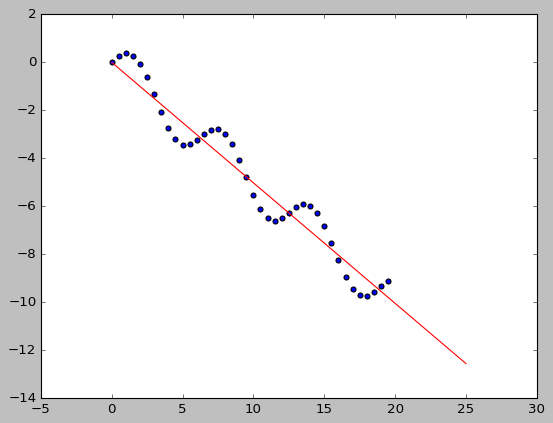

In [88]:
plt.scatter(X, Y)
line_xs = [0, 25]
line_ys = [linear_regression(params[1], params[0], x) for x in line_xs]
plt.plot(line_xs, line_ys,
         color='r', linestyle='-')